In [2]:
import sys
sys.path.insert(0, '..')
# sys.path.insert(1, '../python/')
# import root_numpy as rnp
import uproot
import python.file_manager as fm
import ROOT
import awkward as ak

In [3]:
# input_dir = '/eos/cms/store/cmst3/group/l1tr/cerminar/hgcal/CMSSW1110pre6/DoubleElectron_FlatPt-1To100/DoubleElectron_FlatPt-1To100_PU200_v64C/'
# tree_name = 'l1CaloTriggerNtuplizer_egOnly/HGCalTriggerNtuple'

input_dir = '/eos/cms/store/cmst3/group/l1tr/cerminar/l1teg/fp_ntuples/DoubleElectron_FlatPt-1To100_PU200/FP/v100D/'
tree_name = 'Events'

maxEvents = 100000
debug = 2

In [4]:
input_files = []
range_ev = (0, maxEvents)
input_files = fm.get_files_for_processing(input_dir=input_dir,
                                          tree=tree_name,
                                          nev_toprocess=maxEvents,
                                          debug=debug)

print('- will read {} files from dir {}:'.format(len(input_files), input_dir))
for file_name in input_files:
    print('        - {}'.format(file_name))

# ntuple = HGCalNtuple(input_files, tree=params.tree_name)

tree = ROOT.TChain(tree_name)

glb_files = []
for file_name in input_files:
    protocol = ''
    if '/eos/user/' in file_name:
        protocol = 'root://eosuser.cern.ch/'
    elif '/eos/cms/' in file_name:
        protocol = 'root://eoscms.cern.ch/'
    tree.Add(protocol+file_name)
    glb_files.append(protocol+file_name)

# self._tree = ROOT.TChain(tree)
#     def getEvent(self, index):
#         """Returns Event for a given bindex"""
#         ientry = self._tree.LoadTree(index)
#         if ientry < 0:


# for evt_idx in range(range_ev[0], range_ev[1]+1):
#     # print(evt_idx)
#     event = ntuple.getEvent(evt_idx)
#     ev_manager.read(event, debug)

    

dir already indexed, will read metadata...
[]
copy file: d64289d1-7246-4567-af7a-654ffd1c5b87.json ret: True
- will read 6 files from dir /eos/cms/store/cmst3/group/l1tr/cerminar/l1teg/fp_ntuples/DoubleElectron_FlatPt-1To100_PU200/FP/v100D/:
        - /eos/cms/store/cmst3/group/l1tr/cerminar/l1teg/fp_ntuples/DoubleElectron_FlatPt-1To100_PU200/FP/v100D/perfNano_8830991_0.root
        - /eos/cms/store/cmst3/group/l1tr/cerminar/l1teg/fp_ntuples/DoubleElectron_FlatPt-1To100_PU200/FP/v100D/perfNano_8830991_1.root
        - /eos/cms/store/cmst3/group/l1tr/cerminar/l1teg/fp_ntuples/DoubleElectron_FlatPt-1To100_PU200/FP/v100D/perfNano_8830991_2.root
        - /eos/cms/store/cmst3/group/l1tr/cerminar/l1teg/fp_ntuples/DoubleElectron_FlatPt-1To100_PU200/FP/v100D/perfNano_8830991_3.root
        - /eos/cms/store/cmst3/group/l1tr/cerminar/l1teg/fp_ntuples/DoubleElectron_FlatPt-1To100_PU200/FP/v100D/perfNano_8830991_4.root
        - /eos/cms/store/cmst3/group/l1tr/cerminar/l1teg/fp_ntuples/DoubleElec

## Exercise tree to awkward-array conversion

In [14]:
file_dic = {glb_files[0]: 'Events'}

file_dic = {}
for f in glb_files[:3]:
    file_dic[f] = 'Events'



files =  uproot.open(file_dic)
# tree = files['Events']


ValueError: 'path' must be a string, pathlib.Path, an object with 'read' and 'seek' methods, or a length-1 dict of {file_path: object_path}, not {'root://eoscms.cern.ch//eos/cms/store/cmst3/group/l1tr/cerminar/l1teg/fp_ntuples/DoubleElectron_FlatPt-1To100_PU200/FP/v100D/perfNano_8830991_0.root': 'Events', 'root://eoscms.cern.ch//eos/cms/store/cmst3/group/l1tr/cerminar/l1teg/fp_ntuples/DoubleElectron_FlatPt-1To100_PU200/FP/v100D/perfNano_8830991_1.root': 'Events', 'root://eoscms.cern.ch//eos/cms/store/cmst3/group/l1tr/cerminar/l1teg/fp_ntuples/DoubleElectron_FlatPt-1To100_PU200/FP/v100D/perfNano_8830991_2.root': 'Events', 'root://eoscms.cern.ch//eos/cms/store/cmst3/group/l1tr/cerminar/l1teg/fp_ntuples/DoubleElectron_FlatPt-1To100_PU200/FP/v100D/perfNano_8830991_3.root': 'Events', 'root://eoscms.cern.ch//eos/cms/store/cmst3/group/l1tr/cerminar/l1teg/fp_ntuples/DoubleElectron_FlatPt-1To100_PU200/FP/v100D/perfNano_8830991_4.root': 'Events', 'root://eoscms.cern.ch//eos/cms/store/cmst3/group/l1tr/cerminar/l1teg/fp_ntuples/DoubleElectron_FlatPt-1To100_PU200/FP/v100D/perfNano_8830991_5.root': 'Events'}

In [6]:
files.keys()

['run',
 'luminosityBlock',
 'event',
 'bunchCrossing',
 'nTkEleL2',
 'TkEleL2_eta',
 'TkEleL2_pfIso',
 'TkEleL2_pfIsoPV',
 'TkEleL2_phi',
 'TkEleL2_pt',
 'TkEleL2_puppiIso',
 'TkEleL2_puppiIsoPV',
 'TkEleL2_tkEta',
 'TkEleL2_tkIso',
 'TkEleL2_tkIsoPV',
 'TkEleL2_tkPhi',
 'TkEleL2_tkPt',
 'TkEleL2_vz',
 'TkEleL2_charge',
 'TkEleL2_hwQual',
 'nTkEmL2',
 'TkEmL2_eta',
 'TkEmL2_pfIso',
 'TkEmL2_pfIsoPV',
 'TkEmL2_phi',
 'TkEmL2_pt',
 'TkEmL2_puppiIso',
 'TkEmL2_puppiIsoPV',
 'TkEmL2_tkIso',
 'TkEmL2_tkIsoPV',
 'TkEmL2_charge',
 'TkEmL2_hwQual',
 'nGenEl',
 'GenEl_pt',
 'GenEl_eta',
 'GenEl_phi',
 'GenEl_vz',
 'GenEl_caloeta',
 'GenEl_calophi',
 'GenEl_charge',
 'GenEl_prompt',
 'GenEl_pdgid',
 'nGenPh',
 'GenPh_pt',
 'GenPh_eta',
 'GenPh_phi',
 'GenPh_vz',
 'GenPh_caloeta',
 'GenPh_calophi',
 'GenPh_charge',
 'GenPh_prompt',
 'GenPh_pdgid',
 'nHGCal3DCl',
 'HGCal3DCl_emaxe',
 'HGCal3DCl_eta',
 'HGCal3DCl_hoe',
 'HGCal3DCl_layer10',
 'HGCal3DCl_layer50',
 'HGCal3DCl_layer90',
 'HGCal3DCl_m

In [15]:
darr = uproot.dask(file_dic, library='ak')

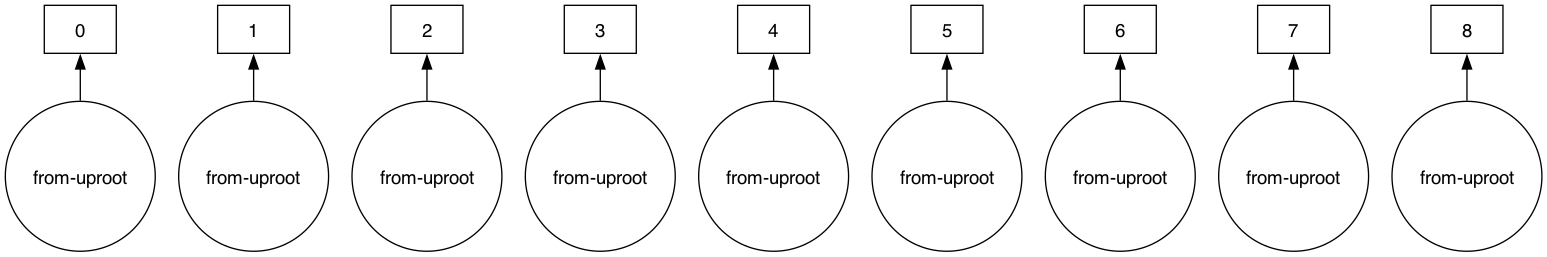

In [18]:
darr.visualize()

In [21]:
print(darr.TkEleL2_pt)

dask.awkward<TkEleL2-pt, npartitions=9>


In [34]:
newele_darr = darr[['TkEleL2_pt', 'TkEleL2_eta']]

In [ ]:
dak

In [36]:
dir(newele_darr)

['TkEleL2_eta',
 'TkEleL2_pt',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__get__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__self__',
 '__self_class__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__thisclass__',
 '_dask',
 '_divisions',
 '_meta',
 '_name',
 'attrs',
 'behavior',
 'clear_divisions',
 'compute',
 'dask',
 'defined_divisions',
 'divisions',
 'eager_compute_divisions',
 'fields',
 'form',
 'head',
 'keys',
 'keys_array',
 'known_divisions',
 'layout',
 'map_partitions',
 'mask',
 'name',
 'ndim',
 'npartitions',
 'partitions',
 'persist',
 'repartition',
 'reset_meta',
 'to_dask_array',
 'to_dask_bag',
 'to_delayed',
 'to_parquet',
 'type',
 'visualize']

In [64]:
import hist
import hist.dask as dah
import uproot as up

In [72]:
myhist =    dah.Hist(
        hist.axis.Regular(bins=100, start=0, stop=100, name="xaxis"),
        label="test_label",
        name="test_name",
        storage=hist.storage.Weight()
        )


In [73]:
myhist.fill(ak.flatten(newele_darr.TkEleL2_pt))

Hist(Regular(100, 0, 100, name='xaxis'), storage=Weight()) # Sum: WeightedSum(value=0, variance=0) (has staged fills)

In [74]:
dmyhist = myhist.compute()
dmyhist

Hist(Regular(100, 0, 100, name='xaxis'), storage=Weight()) # Sum: WeightedSum(value=138090, variance=138090) (WeightedSum(value=139669, variance=139669) with flow)

In [75]:
myhist.label
up.to_writable(myhist)

<TH1D (version 3) at 0x0003074f8e80>

In [76]:
dir(dmyhist)

['T',
 '__add__',
 '__annotations__',
 '__array__',
 '__class__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__idiv__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__isub__',
 '__itruediv__',
 '__le__',
 '__lt__',
 '__module__',
 '__mul__',
 '__ne__',
 '__new__',
 '__radd__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmul__',
 '__setattr__',
 '__setitem__',
 '__setstate__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 '__weakref__',
 '_axis',
 '_clone',
 '_compute_commonindex',
 '_compute_inplace_op',
 '_compute_uhi_index',
 '_export_bh_',
 '_family',
 '_from_histogram_cpp',
 '_from_histogram_object',
 '_generate_axes_',
 '_hist',
 '_import_bh_',
 '_index_transform',
 '_loc_shortcut',
 '_name_to_index',
 '_new_hist',
 '_reduce',
 '_repr_html_',
 '_

In [77]:
myhist.label


'test_label'

In [22]:
import dask_awkward as dak


In [25]:
nele = dak.num(darr.TkEleL2_pt, axis=1)

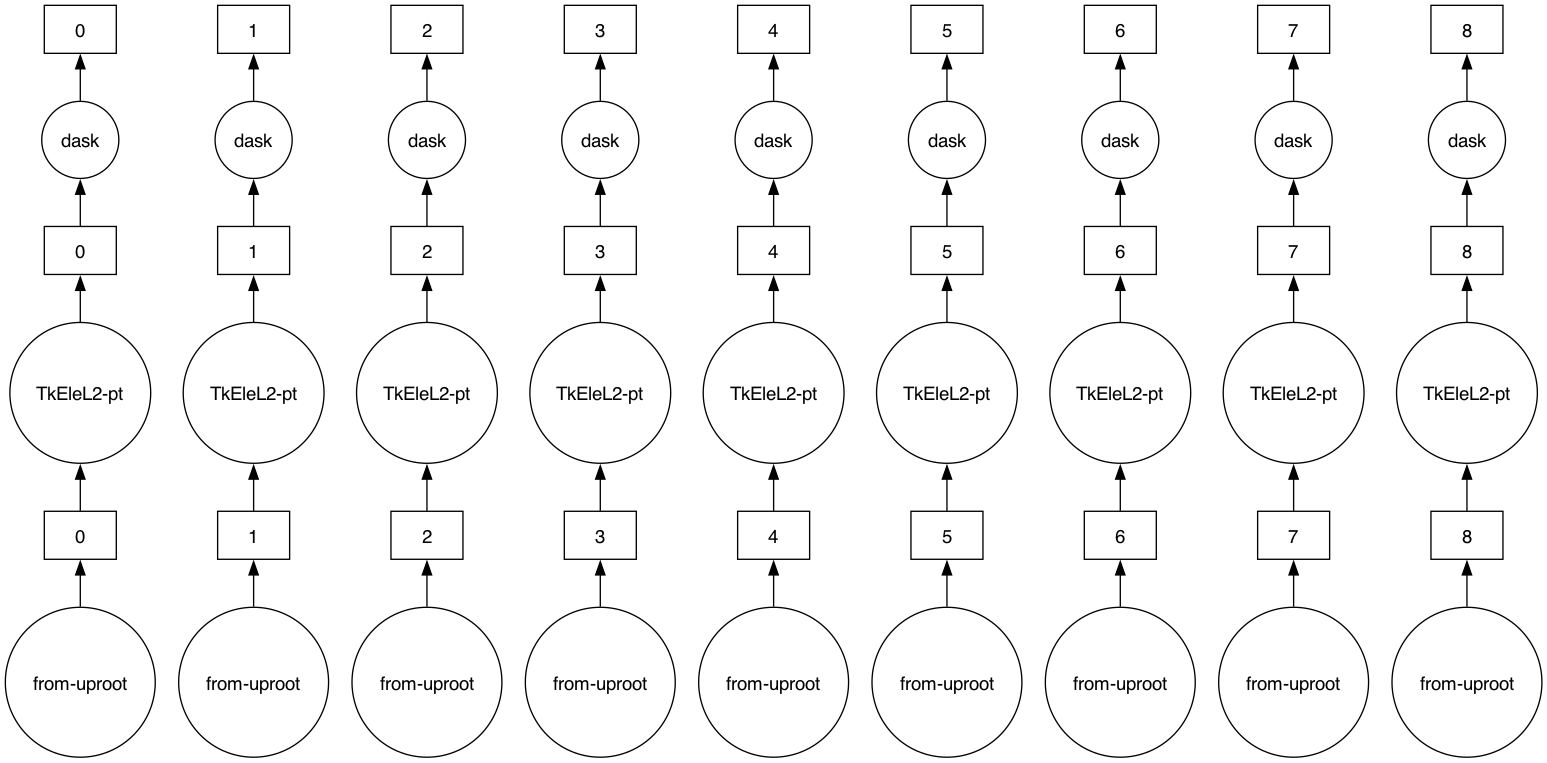

In [26]:
nele.visualize()

In [40]:
nele.compute()


<Array [2, 3, 2, 2, 3, 2, 3, 2, ..., 2, 2, 3, 2, 1, 1, 0] type='99520 * int64'>

In [29]:
darr.fields

['run',
 'luminosityBlock',
 'event',
 'bunchCrossing',
 'nTkEleL2',
 'TkEleL2_eta',
 'TkEleL2_pfIso',
 'TkEleL2_pfIsoPV',
 'TkEleL2_phi',
 'TkEleL2_pt',
 'TkEleL2_puppiIso',
 'TkEleL2_puppiIsoPV',
 'TkEleL2_tkEta',
 'TkEleL2_tkIso',
 'TkEleL2_tkIsoPV',
 'TkEleL2_tkPhi',
 'TkEleL2_tkPt',
 'TkEleL2_vz',
 'TkEleL2_charge',
 'TkEleL2_hwQual',
 'nTkEmL2',
 'TkEmL2_eta',
 'TkEmL2_pfIso',
 'TkEmL2_pfIsoPV',
 'TkEmL2_phi',
 'TkEmL2_pt',
 'TkEmL2_puppiIso',
 'TkEmL2_puppiIsoPV',
 'TkEmL2_tkIso',
 'TkEmL2_tkIsoPV',
 'TkEmL2_charge',
 'TkEmL2_hwQual',
 'nGenEl',
 'GenEl_pt',
 'GenEl_eta',
 'GenEl_phi',
 'GenEl_vz',
 'GenEl_caloeta',
 'GenEl_calophi',
 'GenEl_charge',
 'GenEl_prompt',
 'GenEl_pdgid',
 'nGenPh',
 'GenPh_pt',
 'GenPh_eta',
 'GenPh_phi',
 'GenPh_vz',
 'GenPh_caloeta',
 'GenPh_calophi',
 'GenPh_charge',
 'GenPh_prompt',
 'GenPh_pdgid',
 'nHGCal3DCl',
 'HGCal3DCl_emaxe',
 'HGCal3DCl_eta',
 'HGCal3DCl_hoe',
 'HGCal3DCl_layer10',
 'HGCal3DCl_layer50',
 'HGCal3DCl_layer90',
 'HGCal3DCl_m

In [41]:
aele_darr = darr[['TkEleL2_pt', 'TkEleL2_eta']]



In [42]:
new_darr = dak.Array(name='test', ) 

TypeError: Array.__init__() missing 3 required positional arguments: 'dsk', 'meta', and 'divisions'

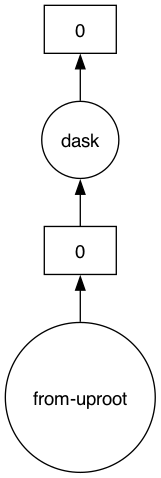

In [17]:
ele_darr.visualize()

In [16]:
ele_darr.compute()


<Array [{TkEleL2_pt: [...], ...}, ..., {...}] type='15520 * {TkEleL2_pt: va...'>

In [17]:
ele_darr.show()

[...]


KeyboardInterrupt: 

In [42]:
# file =  uproot4.open('root://eoscms.cern.ch//eos/cms/store/cmst3/group/l1tr/cerminar/l1teg/ntuples/MinBias_TuneCP5_14TeV-pythia8/NuGunAllEta_PU200_v91G/230404_115207/0000/ntuple_1.root')
file =  uproot4.open('root://eoscms.cern.ch//eos/cms/store/cmst3/group/l1tr/cerminar/l1teg/fp_ntuples/DoubleElectron_FlatPt-1To100_PU200/FP/v100D/perfNano_8830991_0.root')
tree = file['Events']
arr = tree.arrays(['TkEleL2_pt', 'TkEleL2_eta'], library='pd', entry_start=0, entry_stop=2000)
arr.rename(columns={'TkEleL2_pt':'pt', 'TkEleL2_eta':'eta','pippo': 'pluto' }, inplace=True)
# arr.reset_index(level=[0], drop=True, inplace=True)


In [43]:
dar = uproot4.dask({'root://eoscms.cern.ch//eos/cms/store/cmst3/group/l1tr/cerminar/l1teg/fp_ntuples/DoubleElectron_FlatPt-1To100_PU200/FP/v100D/perfNano_8830991_0.root': 'Events'})
dar

TypeError: `a` should be an awkward array or a Dask awkward collection.
Got type <class 'awkward.contents.recordarray.RecordArray'>

In [44]:
# dar.compute()
dar.fields

NameError: name 'dar' is not defined

In [45]:
pippo = dar[['TkEleL2_eta', 'TkEleL2_phi', 'TkEleL2_pt']]

NameError: name 'dar' is not defined

In [46]:
pippo

NameError: name 'pippo' is not defined

In [47]:
file.keys()

['Events;1', 'LuminosityBlocks;1', 'Runs;1', 'MetaData;1', 'ParameterSets;1']

In [48]:
tree.keys()

['run',
 'luminosityBlock',
 'event',
 'bunchCrossing',
 'nTkEleL2',
 'TkEleL2_eta',
 'TkEleL2_pfIso',
 'TkEleL2_pfIsoPV',
 'TkEleL2_phi',
 'TkEleL2_pt',
 'TkEleL2_puppiIso',
 'TkEleL2_puppiIsoPV',
 'TkEleL2_tkEta',
 'TkEleL2_tkIso',
 'TkEleL2_tkIsoPV',
 'TkEleL2_tkPhi',
 'TkEleL2_tkPt',
 'TkEleL2_vz',
 'TkEleL2_charge',
 'TkEleL2_hwQual',
 'nTkEmL2',
 'TkEmL2_eta',
 'TkEmL2_pfIso',
 'TkEmL2_pfIsoPV',
 'TkEmL2_phi',
 'TkEmL2_pt',
 'TkEmL2_puppiIso',
 'TkEmL2_puppiIsoPV',
 'TkEmL2_tkIso',
 'TkEmL2_tkIsoPV',
 'TkEmL2_charge',
 'TkEmL2_hwQual',
 'nGenEl',
 'GenEl_pt',
 'GenEl_eta',
 'GenEl_phi',
 'GenEl_vz',
 'GenEl_caloeta',
 'GenEl_calophi',
 'GenEl_charge',
 'GenEl_prompt',
 'GenEl_pdgid',
 'nGenPh',
 'GenPh_pt',
 'GenPh_eta',
 'GenPh_phi',
 'GenPh_vz',
 'GenPh_caloeta',
 'GenPh_calophi',
 'GenPh_charge',
 'GenPh_prompt',
 'GenPh_pdgid',
 'nHGCal3DCl',
 'HGCal3DCl_emaxe',
 'HGCal3DCl_eta',
 'HGCal3DCl_hoe',
 'HGCal3DCl_layer10',
 'HGCal3DCl_layer50',
 'HGCal3DCl_layer90',
 'HGCal3DCl_m

In [15]:
tree.num_entries

15520

In [16]:
arr

,pt,eta
0,"[41.5, 34.5]","[-0.7421875, 0.77734375]"
1,"[81.5, 80.5, 4.5]","[-1.23046875, 1.24609375, 0.14794921875]"
2,"[34.75, 33.0]","[-0.671875, 0.671875]"
3,"[78.25, 76.25]","[0.2705078125, -0.2353515625]"
4,"[99.0, 94.75, 2.75]","[1.421875, -1.44140625, -1.44140625]"
...,...,...
1995,"[12.0, 10.75, 4.25]","[-1.38671875, 1.421875, 1.16015625]"
1996,"[31.25, 20.5]","[1.44140625, -1.40625]"
1997,"[50.75, 50.5]","[-0.078125, 0.095947265625]"
1998,"[41.75, 40.25]","[0.078125, -0.02606201171875]"


In [8]:
arr.pt

0              [41.5, 34.5]
1         [81.5, 80.5, 4.5]
2             [34.75, 33.0]
3            [78.25, 76.25]
4       [99.0, 94.75, 2.75]
               ...         
1995    [12.0, 10.75, 4.25]
1996          [31.25, 20.5]
1997          [50.75, 50.5]
1998         [41.75, 40.25]
1999                [61.75]
Name: pt, Length: 2000, dtype: awkward

In [9]:
import awkward as ak


In [10]:
tkele = dar[['TkEleL2_pt', 'TkEleL2_eta', 'TkEleL2_phi']]
tkele['pt'] = tkele.TkEleL2_pt


## Convert tree to awkward-array using aliases for the column names

In [12]:
tkele = tree.arrays(
    ['pt', 'eta', 'phi'], 
    library='ak', 
    entry_start=0, 
    entry_stop=2000, 
    aliases={
        'pt': 'TkEleL2_pt',  
        'eta': 'TkEleL2_eta',
        'phi': 'TkEleL2_phi'},)


## We create di-obj pairs 

In [13]:
tkele

<Array [{pt: [41.5, ...], eta: ..., ...}, ...] type='2000 * {pt: var * floa...'>

In [14]:
tkele_mom = ak.with_name(tkele, name='Momentum4D', highlevel=False)

NameError: name 'ak' is not defined

In [15]:
tkele_mom

NameError: name 'tkele_mom' is not defined

In [16]:
tkele_rec = ak.with_name(tkele, name='tkele')

NameError: name 'ak' is not defined

In [17]:
tkele_rec

NameError: name 'tkele_rec' is not defined

In [18]:
diobj = ak.combinations(
        array=tkele_mom,
        n=2, 
        axis=1,
#         fields=['leg0', 'leg1']
)

NameError: name 'ak' is not defined

In [19]:
diobj

NameError: name 'diobj' is not defined

## Using records and behaviors

In [20]:
import vector
vector.register_awkward()

In [21]:
tree['TkEleL2_pt']

<TBranch 'TkEleL2_pt' at 0x000318855960>

In [22]:
ele_p4 = vector.zip({'pt': tkele.pt, 'eta': tkele.eta, 'phi': tkele.phi, "qual": tkele.phi, 'mass': 0})

In [23]:
tkele['mass'] = 0.*tkele.pt

In [24]:
tkele

<Array [{pt: [41.5, ...], eta: ..., ...}, ...] type='2000 * {pt: var * floa...'>

In [25]:
ele_p4.energy

<Array [[53.5, 45.5], [151, ..., 4.55], ..., [225]] type='2000 * var * float64'>

In [26]:
tkele.fields

data = {}
for field in tkele.fields:
    data[field] = tkele[field]


In [27]:
# this is an array of records
ele_rec = ak.zip(data, with_name="pippo")

NameError: name 'ak' is not defined

In [28]:
ele_rec

NameError: name 'ele_rec' is not defined

In [29]:
ele_p4

<MomentumArray4D [[{rho: 41.5, phi: 1.6, ...}, ...], ...] type='2000 * var ...'>

In [30]:

ele_p4[1]

<MomentumArray4D [{rho: 81.5, phi: -1.75, ...}, ...] type='3 * Momentum4D[r...'>

## Create a flat list for ML evaluation

In [31]:
array = ak.flatten(ele_rec[['pt', 'eta']], axis=1)
input_data = ak.concatenate(ak.unzip(array[:, np.newaxis]), axis=1)
input_data

NameError: name 'ak' is not defined

In [32]:
print (np.asarray(input_data))

NameError: name 'np' is not defined

In [33]:
# from xgboost import XGBClassifier
# Load model using booster
import xgboost

booster = xgboost.Booster()
booster.load_model('../data/hgcegid_3151_loweta_xgboost.json')
print(booster.get_dump())
# eg_hgc_model = XGBClassifier()
# eg_hgc_model.load_model('../data/hgcegid_3151_loweta_xgboost.json')
matrix = xgboost.DMatrix(np.asarray(input_data))
score =  booster.predict(matrix)
score

[10:38:15] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:888: Found JSON model saved before XGBoost 1.6, please save the model using current version again. The support for old JSON model will be discontinued in XGBoost 2.3.
['0:[f6<0.00445567397] yes=1,no=2,missing=1\n\t1:[f3<18] yes=3,no=4,missing=3\n\t\t3:[f5<0.0022138569] yes=7,no=8,missing=7\n\t\t\t7:[f7<0.00848813169] yes=15,no=16,missing=15\n\t\t\t\t15:[f6<0.00304722111] yes=31,no=32,missing=31\n\t\t\t\t\t31:[f1<7] yes=61,no=62,missing=61\n\t\t\t\t\t\t61:leaf=0.150000006\n\t\t\t\t\t\t62:leaf=-0.533333421\n\t\t\t\t\t32:leaf=0.55384618\n\t\t\t\t16:leaf=-0.592332304\n\t\t\t8:[f6<0.00415187096] yes=17,no=18,missing=17\n\t\t\t\t17:[f4<16.4873199] yes=33,no=34,missing=33\n\t\t\t\t\t33:[f0<5.5] yes=63,no=64,missing=63\n\t\t\t\t\t\t63:leaf=-0.4909091\n\t\t\t\t\t\t64:leaf=0.588385999\n\t\t\t\t\t34:[f0<10.5] yes=65,no=66,missing=65\n\t\t\t\t\t\t65:leaf=0.152662694\

NameError: name 'np' is not defined

In [34]:
ak.Array(score)

NameError: name 'ak' is not defined

In [35]:
ele_rec.fields

NameError: name 'ele_rec' is not defined

In [36]:
counts = ak.num(ele_rec)
counts

NameError: name 'ak' is not defined

In [37]:
# flatten
ele_flat = ak.flatten(ele_rec)
ele_flat

NameError: name 'ak' is not defined

In [191]:
# add a record or run a ufunc
ele_flat['bdtscore'] = score
ele_flat

<Array [{pt: 41.5, eta: -0.742, ...}, ...] type='2838 * pippo[pt: float32, ...'>

In [192]:
# unflatten
ak.unflatten(ele_flat, counts)

<Array [[{pt: 41.5, eta: ..., ...}, ...], ...] type='2000 * var * pippo[pt:...'>

## TMVA evaluation


In [198]:
cl3D_branches = [br for br in tree.keys() if 'HGCal3DCl_' in br]
cl3D_branches

['HGCal3DCl_emaxe',
 'HGCal3DCl_eta',
 'HGCal3DCl_hoe',
 'HGCal3DCl_layer10',
 'HGCal3DCl_layer50',
 'HGCal3DCl_layer90',
 'HGCal3DCl_meanz',
 'HGCal3DCl_ntc67',
 'HGCal3DCl_ntc90',
 'HGCal3DCl_phi',
 'HGCal3DCl_pt',
 'HGCal3DCl_ptEm',
 'HGCal3DCl_seemax',
 'HGCal3DCl_seetot',
 'HGCal3DCl_sppmax',
 'HGCal3DCl_spptot',
 'HGCal3DCl_srrmax',
 'HGCal3DCl_srrmean',
 'HGCal3DCl_srrtot',
 'HGCal3DCl_szz',
 'HGCal3DCl_coreshowerlength',
 'HGCal3DCl_firstlayer',
 'HGCal3DCl_hwQual',
 'HGCal3DCl_maxlayer',
 'HGCal3DCl_nTcs',
 'HGCal3DCl_showerlength']

In [199]:
cl3d_aliases = {}
for br in cl3D_branches:
    cl3d_aliases[br.split('_')[1]] = br
cl3d_aliases

{'emaxe': 'HGCal3DCl_emaxe',
 'eta': 'HGCal3DCl_eta',
 'hoe': 'HGCal3DCl_hoe',
 'layer10': 'HGCal3DCl_layer10',
 'layer50': 'HGCal3DCl_layer50',
 'layer90': 'HGCal3DCl_layer90',
 'meanz': 'HGCal3DCl_meanz',
 'ntc67': 'HGCal3DCl_ntc67',
 'ntc90': 'HGCal3DCl_ntc90',
 'phi': 'HGCal3DCl_phi',
 'pt': 'HGCal3DCl_pt',
 'ptEm': 'HGCal3DCl_ptEm',
 'seemax': 'HGCal3DCl_seemax',
 'seetot': 'HGCal3DCl_seetot',
 'sppmax': 'HGCal3DCl_sppmax',
 'spptot': 'HGCal3DCl_spptot',
 'srrmax': 'HGCal3DCl_srrmax',
 'srrmean': 'HGCal3DCl_srrmean',
 'srrtot': 'HGCal3DCl_srrtot',
 'szz': 'HGCal3DCl_szz',
 'coreshowerlength': 'HGCal3DCl_coreshowerlength',
 'firstlayer': 'HGCal3DCl_firstlayer',
 'hwQual': 'HGCal3DCl_hwQual',
 'maxlayer': 'HGCal3DCl_maxlayer',
 'nTcs': 'HGCal3DCl_nTcs',
 'showerlength': 'HGCal3DCl_showerlength'}

In [202]:
[k for k in cl3d_aliases.keys()]

['emaxe',
 'eta',
 'hoe',
 'layer10',
 'layer50',
 'layer90',
 'meanz',
 'ntc67',
 'ntc90',
 'phi',
 'pt',
 'ptEm',
 'seemax',
 'seetot',
 'sppmax',
 'spptot',
 'srrmax',
 'srrmean',
 'srrtot',
 'szz',
 'coreshowerlength',
 'firstlayer',
 'hwQual',
 'maxlayer',
 'nTcs',
 'showerlength']

In [204]:

cl3ds = tree.arrays(
    [k for k in cl3d_aliases.keys()], 
    library='ak', 
    entry_start=0, 
    entry_stop=2000, 
    aliases=cl3d_aliases,)
cl3ds

<Array [{emaxe: [...], eta: [...], ...}, ...] type='2000 * {emaxe: var * fl...'>

In [205]:
records = {}
for field in cl3ds.fields:
    records[field] = cl3ds[field]
        
records['mass'] = 0.*cl3ds['pt']
cl3ds_rec = vector.zip(records)
cl3ds_rec

<MomentumArray4D [[{rho: 4.16, phi: ..., ...}, ...], ...] type='2000 * var ...'>

In [239]:
import array
xml_model_file = '../data/egamma_id_histomax_3151_loweta_v0.xml'
variables = [
  'coreshowerlength', 
  'showerlength', 
  'firstlayer', 
  'maxlayer', 
  'szz', 
  'srrmean', 
  'srrtot', 
  'seetot', 
  'spptot']

in_var = {}
for var in variables: 
  in_var[var] = array.array( 'f', [0.] )

bdt = ROOT.TMVA.Reader()
for var in variables: 
  bdt.AddVariable( 'cl3d_'+var, in_var[var] )

bdt.BookMVA( "BDT", xml_model_file)


                         : Booking "BDT" of type "BDT" from ../data/egamma_id_histomax_3151_loweta_v0.xml.
                         : Reading weight file: ../data/egamma_id_histomax_3151_loweta_v0.xml
<HEADER> DataSetInfo              : [Default] : Added class "background"
<HEADER> DataSetInfo              : [Default] : Added class "signal"
                         : Booked classifier "bdt" of type: "BDT"


In [241]:
# from root_numpy.tmva import add_regression_events, evaluate_reader


# Loop over input vars and extract values from tree  

for var in variables: 
    in_var[var] = np.asarray(ak.flatten(cl3ds_rec[var]), dtype=np.float32)
    
print(in_var)    
    # var_beforenorm = getattr( in_cl3d, "%s"%var ) 

    ##### Normalize the features
    # norm = norms_lowpt if "_lowpt" in b else norms_highpt
    # min_ = norm[var][0]
    # max_ = norm[var][1]
    # var_afternorm  = (var_beforenorm-min_)/(max_-min_)
    # var_scaled = var_afternorm * (max_-min_) + min_
    # print var, var_beforenorm, var_afternorm, var_scaled
    # _bdt_var[var][0]=var_afternorm

    ##### Quantize the features using python bindings    
    # if var=="hoe":_bdt_var[var][0]=cc.makeHoe(var_beforenorm)
    # if var=="tkpt":_bdt_var[var][0]=cc.makePtFromFloat(var_beforenorm)
    # if var=="srrtot":_bdt_var[var][0]=cc.makeSrrTot(var_beforenorm)
    # if var=="deta":_bdt_var[var][0]=cc.makeEta(var_beforenorm)
    # if var=="dpt":_bdt_var[var][0]=cc.makePtFromFloat(var_beforenorm)
    # if var=="meanz":_bdt_var[var][0]=cc.makeMeanZ(var_beforenorm)
    # if var=="dphi":_bdt_var[var][0]=cc.makePhi(var_beforenorm)
    # if var=="tkchi2":_bdt_var[var][0]=cc.makeChi2(var_beforenorm)
    # if var=="tkz0":_bdt_var[var][0]=cc.makeZ0(var_beforenorm)
    # if var=="tknstubs": _bdt_var[var][0]=var_beforenorm

  #return BDT score
  # print (_bdt[0].EvaluateMVA("BDT"))
print(bdt.EvaluateMVA("BDT"))


{'coreshowerlength': array([ 9., 10.,  9., ..., 12.,  3.,  8.], dtype=float32), 'showerlength': array([36., 47., 30., ..., 23., 13., 32.], dtype=float32), 'firstlayer': array([1., 1., 1., ..., 1., 1., 1.], dtype=float32), 'maxlayer': array([5., 3., 3., ..., 5., 1., 9.], dtype=float32), 'szz': array([26.301617 , 56.879974 , 18.406479 , ...,  5.304145 ,  7.3010397,
       19.422394 ], dtype=float32), 'srrmean': array([0.00376129, 0.00350818, 0.00477161, ..., 0.00349465, 0.00173093,
       0.00426034], dtype=float32), 'srrtot': array([0.00704156, 0.00717032, 0.0075128 , ..., 0.00360183, 0.00568108,
       0.00538071], dtype=float32), 'seetot': array([0.06766404, 0.07139271, 0.07087738, ..., 0.0120809 , 0.01922292,
       0.01667503], dtype=float32), 'spptot': array([0.04661442, 0.05295866, 0.01951752, ..., 0.01719357, 0.01253225,
       0.01202089], dtype=float32)}
0.4708220044124092


In [251]:

import conifer
import xml.etree.ElementTree as ET
# model_xml = ET.parse(xml_model_file)
model_xml = ET.parse('../data/Photon_Pion_vs_Neutrino_BDTweights_1116.xml')
print(model_xml)

model = conifer.converters.convert_from_tmva(model_xml)
# print(model.config.backend) # expect 'python'
# X = np.array # some data
# y = model.decision_function(X)

AttributeError: 'xml.etree.ElementTree.Element' object has no attribute 'getchildren'

## Create pairs using the records

In [36]:
ele_pairs = ak.combinations(ele_p4, 2, fields=['leg0', 'leg1'])

In [37]:
ele_pairs

<Array [[], [{leg0: {...}, ...}, ...], ..., []] type='1120 * var * {leg0: M...'>

In [38]:
ele_pairs[1]

<Array [{leg0: {...}, leg1: {...}}, ..., {...}] type='3 * {leg0: Momentum4D...'>

In [39]:
ele_pairs[ele_pairs.leg0.phi > 0]

<Array [[], [{leg0: {...}, ...}], ..., [], []] type='1120 * var * {leg0: Mo...'>

In [40]:
ele_pairs.leg0.qual < 0

<Array [[], [True, True, False], [...], ..., [], []] type='1120 * var * bool'>

## We now use the vector functionality 

In [41]:
objs_sum = ele_pairs.leg0+ele_pairs.leg1
objs_sum[ak.count((objs_sum).pt, axis=1) > 0][:, 0].mass

<Array [138, 384, 190, 169, 320, ..., 233, 295, 766, 579] type='687 * float64'>

## We read the event properties

In [23]:
eventid = tree.arrays(['run', 'lumi', 'event'], library='ak', entry_start=0, entry_stop=2000)
eventid

<Array [{run: 1, lumi: 619, ...}, ..., {...}] type='1120 * {run: int32, lum...'>

## Gen matching based on DR

In [83]:
gen = tree.arrays(['pt', 'eta', 'phi', 'pdgid'], library='ak', entry_start=0, entry_stop=2000, aliases={'pt': 'GenEl_pt',  
                                                                                        'eta': 'GenEl_eta',
                                                                                        'phi': 'GenEl_phi',
                                                                                        'pdgid': 'GenEl_pdgid'})


In [ ]:
# perform the matching
match_eta = ak.cartesian([objects.eta, gen[self.gen_eta_phi_columns[0]]])
match_phi = ak.cartesian([objects.phi, gen[self.gen_eta_phi_columns[1]]])
match_pt = ak.cartesian([objects.pt, gen.pt])
match_idx = ak.argcartesian([objects.eta, gen.eta])

obj_eta, gen_eta = ak.unzip(match_eta)
obj_phi, gen_phi = ak.unzip(match_phi)
obj_pt, gen_pt = ak.unzip(match_pt)
obj_idx, gen_idx = ak.unzip(match_idx)
dpt = np.abs(obj_pt - gen_pt)
dr2 = (obj_eta-gen_eta)**2+(obj_phi-gen_phi)**2
match = ak.Array(data={'ele_idx': obj_idx, 'gen_idx': gen_idx, 'dpt': dpt, 'dr2': dr2})
dr_match=match[match.dr2<self.dr2]
for genid in np.unique(ak.flatten(dr_match.gen_idx)):
    gen_match_id = dr_match[dr_match.gen_idx == genid]
    dpt_min_index = ak.argmin(gen_match_id.dpt, axis=1, keepdims=True)
    best_match_id = gen_match_id[dpt_min_index]
    matched_obj = objects[best_match_id.ele_idx]
    matched_gen = gen[best_match_id.gen_idx]
    h_object_matched.fill(matched_obj)
    if h_gen_matched is not None:
        h_gen_matched.fill(matched_gen)
    h_reso.fill(reference=matched_gen,
                target=matched_obj)

In [50]:
tree.keys()

['run',
 'luminosityBlock',
 'event',
 'bunchCrossing',
 'nTkEleL2',
 'TkEleL2_eta',
 'TkEleL2_pfIso',
 'TkEleL2_pfIsoPV',
 'TkEleL2_phi',
 'TkEleL2_pt',
 'TkEleL2_puppiIso',
 'TkEleL2_puppiIsoPV',
 'TkEleL2_tkEta',
 'TkEleL2_tkIso',
 'TkEleL2_tkIsoPV',
 'TkEleL2_tkPhi',
 'TkEleL2_tkPt',
 'TkEleL2_vz',
 'TkEleL2_charge',
 'TkEleL2_hwQual',
 'nTkEmL2',
 'TkEmL2_eta',
 'TkEmL2_pfIso',
 'TkEmL2_pfIsoPV',
 'TkEmL2_phi',
 'TkEmL2_pt',
 'TkEmL2_puppiIso',
 'TkEmL2_puppiIsoPV',
 'TkEmL2_tkIso',
 'TkEmL2_tkIsoPV',
 'TkEmL2_charge',
 'TkEmL2_hwQual',
 'nGenEl',
 'GenEl_pt',
 'GenEl_eta',
 'GenEl_phi',
 'GenEl_vz',
 'GenEl_caloeta',
 'GenEl_calophi',
 'GenEl_charge',
 'GenEl_prompt',
 'GenEl_pdgid',
 'nGenPh',
 'GenPh_pt',
 'GenPh_eta',
 'GenPh_phi',
 'GenPh_vz',
 'GenPh_caloeta',
 'GenPh_calophi',
 'GenPh_charge',
 'GenPh_prompt',
 'GenPh_pdgid',
 'nHGCal3DCl',
 'HGCal3DCl_emaxe',
 'HGCal3DCl_eta',
 'HGCal3DCl_hoe',
 'HGCal3DCl_layer10',
 'HGCal3DCl_layer50',
 'HGCal3DCl_layer90',
 'HGCal3DCl_m

In [53]:
gen.pdgid

<Array [[11, -11], [11, -11], ..., [...], [11, -11]] type='2000 * var * int32'>

In [54]:
gen[(abs(gen.pdgid) == 11 )][:, 0]

IndexError: cannot slice ListArray (of length 2000) with array(0): index out of range while attempting to get index 0 (in compiled code: https://github.com/scikit-hep/awkward/blob/awkward-cpp-30/awkward-cpp/src/cpu-kernels/awkward_ListArray_getitem_next_at.cpp#L21)

This error occurred while attempting to slice

    <Array [{pt: [...], eta: [...], ...}, ...] type='2000 * {pt: var * floa...'>

with

    (:, 0)

In [55]:
tkele[1]

<Record {pt: [81.5, ...], eta: [...], ...} type='{pt: var * float32, eta: v...'>

In [56]:
gen_eta0 = gen.eta[:, 0]
gen_eta0

IndexError: cannot slice ListArray (of length 2000) with array(0): index out of range while attempting to get index 0 (in compiled code: https://github.com/scikit-hep/awkward/blob/awkward-cpp-30/awkward-cpp/src/cpu-kernels/awkward_ListArray_getitem_next_at.cpp#L21)

This error occurred while attempting to slice

    <Array [[0.763, -0.763], ..., [1.98, ...]] type='2000 * var * float32'>

with

    (:, 0)

In [57]:
match_eta = ak.cartesian([tkele.eta, gen.eta])
match_phi = ak.cartesian([tkele.phi, gen.phi])

match_pt = ak.cartesian([tkele.pt, gen.pt])
match_idx = ak.argcartesian([tkele.eta, gen.eta])

In [58]:
match_eta

<Array [[(-0.742, 0.763), ..., (...)], ...] type='2000 * var * (float32, fl...'>

In [59]:
match_idx

<Array [[(0, 0), (0, ...), ..., (1, 1)], ...] type='2000 * var * (int64, in...'>

In [60]:
match_eta

<Array [[(-0.742, 0.763), ..., (...)], ...] type='2000 * var * (float32, fl...'>

In [61]:
ele_eta, gen_eta = ak.unzip(match_eta)
ele_phi, gen_phi = ak.unzip(match_phi)

ele_pt, gen_pt = ak.unzip(match_pt)
ele_idx, gen_idx = ak.unzip(match_idx)


In [62]:
ele_pt

<Array [[41.5, 41.5, 34.5, 34.5], ..., [61.8, ...]] type='2000 * var * float32'>

In [63]:
gen_pt

<Array [[40.4, 40.4, 40.4, 40.4], ..., [58.7, ...]] type='2000 * var * float32'>

In [64]:
import numpy as np

In [65]:
dr2 = (ele_eta-gen_eta)**2+(ele_phi-gen_phi)**2
dr2

<Array [[12, 0.001, 0.000972, 12.1], ..., [...]] type='2000 * var * float32'>

In [66]:
dp = np.abs(ele_pt-gen_pt)
dp

<Array [[1.08, 1.08, 5.92, 5.92], ..., [3.01, ...]] type='2000 * var * float32'>

In [67]:

tkele[ak.count(tkele.pt, axis=1) > 2][2]

<Record {pt: [78.2, ...], eta: [...], ...} type='{pt: var * float32, eta: v...'>

In [69]:
# tkele['event'] = eventid.event
# gen['event'] = eventid.event


In [68]:
match = ak.Array(data={'ele_idx': ele_idx, 'gen_idx': gen_idx, 'dpt': dp, 'dr2': dr2})
match

<Array [{ele_idx: [0, ...], ...}, ..., {...}] type='2000 * {ele_idx: var * ...'>

In [475]:
# match['event'] = eventid.event

In [69]:
match[3]

<Record {ele_idx: [0, ..., 1], ...} type='{ele_idx: var * int64, gen_idx: v...'>

In [70]:
dr_match=match[match.dr2<0.01]
dr_match

<Array [{ele_idx: [0, ...], ...}, ..., {...}] type='2000 * {ele_idx: var * ...'>

In [71]:
np.unique(ak.flatten(dr_match.gen_idx))

<Array [0, 1] type='2 * int64'>

In [72]:
gen_match_0 = dr_match[dr_match.gen_idx == 0]
gen_match_0

<Array [{ele_idx: [1], gen_idx: [0], ...}, ...] type='2000 * {ele_idx: var ...'>

In [480]:
# gen_match_0['event'] = eventid.event

In [73]:
gen_match_0

<Array [{ele_idx: [1], gen_idx: [0], ...}, ...] type='2000 * {ele_idx: var ...'>

In [74]:
dpt_min_index = ak.Array(ak.argmin(gen_match_0.dpt, axis=1, keepdims=True))
dpt_min_index

<Array [[0], [0], [0], [0], ..., [0], [0], [0], [0]] type='2000 * 1 * ?int64'>

In [75]:
best_match_0 = gen_match_0[dpt_min_index]
best_match_0

<Array [{ele_idx: [1], gen_idx: [0], ...}, ...] type='2000 * {ele_idx: var ...'>

In [76]:
matched_ele = tkele[best_match_0.ele_idx]
matched_ele

<Array [{pt: [34.5], eta: [0.777], ...}, ...] type='2000 * {pt: var * ?floa...'>

In [77]:
matched_gen = gen[best_match_0.gen_idx]
matched_gen

<Array [{pt: [40.4], eta: [0.763], ...}, ...] type='2000 * {pt: var * ?floa...'>

In [78]:
gen_match_0_multi = gen_match_0[ak.count(gen_match_0.gen_idx, axis=1) > 1]
gen_match_0_multi

<Array [{ele_idx: [1, ...], ...}, ..., {...}] type='33 * {ele_idx: var * in...'>

In [79]:
gen_match_0_multi[0]

<Record {ele_idx: [1, 3], gen_idx: [...], ...} type='{ele_idx: var * int64,...'>

In [80]:
ak.num(gen_match_0_multi.ele_idx)

<Array [2, 2, 2, 2, 2, 2, 2, 2, ..., 2, 2, 2, 2, 2, 2, 2, 2] type='33 * int64'>

In [81]:
gen_match_0_multi.ele_idx

<Array [[1, 3], [0, 2], [1, ...], ..., [0, 1], [1, 2]] type='33 * var * int64'>

In [82]:
ak.local_index(gen_match_0_multi.ele_idx)

<Array [[0, 1], [0, 1], [0, ...], ..., [0, 1], [0, 1]] type='33 * var * int64'>

In [86]:
filter_index = ak.Array(ak.argmin(gen_match_0_multi.dpt, axis=1, keepdims=True))
filter_index

<Array [[0], [0], [0], [0], ..., [0], [0], [0], [0]] type='30 * 1 * ?int64'>

In [87]:
gen_match_0_multi.ele_idx.type.show()

30 * var * int64


In [88]:
index = ak.local_index(gen_match_0_multi.ele_idx).type.show()

30 * var * int64


In [89]:
gen_match_0_multi[filter_index]

<Array [{ele_idx: [1], gen_idx: [0], ...}, ...] type='30 * {ele_idx: var * ...'>

In [90]:
sel_0[ak.argmax(sel_0.dpt, axis=1)]

NameError: name 'sel_0' is not defined

In [91]:
gen[sel_match[sel_match.gen_idx == 1 & ak.argmax(sel_match.dpt, axis=1)].gen_idx]

NameError: name 'sel_match' is not defined

In [265]:
tkele[sel_match[sel_match.gen_idx == 1 & ak.argmax(sel_match.dpt, axis=1)].ele_idx]

<Array [None, {pt: [69], ...}, ..., None, None] type='1120 * ?{pt: var * fl...'>

In [92]:
ak.flatten(sel_match[sel_match.gen_idx == 0].gen_idx)

NameError: name 'sel_match' is not defined

In [93]:
sel_match_0 = sel_match[sel_match.gen_idx == 0]

NameError: name 'sel_match' is not defined

In [94]:
sel_multi = sel_match_0[ak.count(sel_match_0.gen_idx, axis=1) > 1]
sel_multi

NameError: name 'sel_match_0' is not defined

In [77]:
tkele

dask.awkward<with-field, npartitions=1>

In [258]:
minidx = ak.argmin(sel_multi.dpt, axis=1)
minidx

<Array [0, 0, 0, 0, 0, 1, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0] type='30 * ?int64'>

In [255]:
sel_multi[['ele_idx', 'dpt', 'gen_idx']]

<Array [{ele_idx: [1, ...], ...}, ..., {...}] type='30 * {ele_idx: var * in...'>

In [176]:
gen['gen_match'] = sel_match.gen_idx

In [261]:
gen[gen.gen_match[gen.gen_match == 0]]

<Array [{pt: [], eta: [], phi: [], ...}, ...] type='1120 * {pt: var * float...'>

In [262]:
gen[1]

<Record {pt: [68.9, ...], eta: [...], ...} type='{pt: var * float32, eta: v...'>

In [259]:
gen_filtered = gen[ak.where(ak.count(sel_match[sel_match.gen_idx == 0].gen_idx>0, axis=1))]

In [260]:
gen_filtered

<Array [{pt: [68.9, ...], eta: ..., ...}, ...] type='701 * {pt: var * float...'>

In [172]:
np.unique(ak.flatten(sel_match.gen_idx))

<Array [0, 1] type='2 * int64'>

In [169]:
gen[0, ]

<Record {pt: [8.55, ...], eta: [...], ...} type='{pt: var * float32, eta: v...'>

In [173]:

gen[:, ak.flatten(gen_idx_def)][0]

IndexError: cannot slice ListArray (of length 1120) with [999   0   0 ... 999 999 999]: index out of range while attempting to get index 999 (in compiled code: https://github.com/scikit-hep/awkward/blob/awkward-cpp-15/awkward-cpp/src/cpu-kernels/awkward_ListArray_getitem_next_array.cpp#L32)

This error occurred while attempting to slice

    <Array [{pt: [...], eta: [...], ...}, ...] type='1120 * {pt: var * floa...'>

with

    (:, <Array [999, 0, 0, 999, 999, 0, ..., 0, 0, 999, 999, 999] type='1152 * int64'>)

In [98]:
tkele[['pt', 'eta', 'phi'], 1]

<Record {pt: [69, ..., 5], eta: [...], ...} type='{pt: var * float32, eta: ...'>

## Basic awkward-array functionality

In [99]:
x, y = np.mgrid[0:5, 2:8]
x

array([[0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2, 2],
       [3, 3, 3, 3, 3, 3],
       [4, 4, 4, 4, 4, 4]])

In [100]:
y

array([[2, 3, 4, 5, 6, 7],
       [2, 3, 4, 5, 6, 7],
       [2, 3, 4, 5, 6, 7],
       [2, 3, 4, 5, 6, 7],
       [2, 3, 4, 5, 6, 7]])

In [101]:
x.ravel()

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 4, 4, 4, 4, 4, 4])

In [102]:
tkele[['eta', 'phi'], 1]

<Record {eta: [0.0437, ...], phi: [...]} type='{eta: var * float32, phi: va...'>

# Convert tree to awkward-array using the ntuple-tools framework

In [103]:
import python.collections as coll
import python.tree_reader as tr

In [17]:
# for batch in events.iterate(step_size="50 kB"):

#     print(repr(batch))

In [104]:
reader = tr.TreeReader((0,1000),1000)

In [105]:
reader.setTree(tree)
reader.next()

open new tree file with # entries: 1120
--- File entry: 0, global entry: 0, tot # events: 0 @ 2023-09-25 15:11:37.222214, MaxRSS 484.85 Mb


True

In [106]:
TkEleEE = reader.getDataFrame('TkEleEE', 100)

In [107]:
TkEleEE

<Array [{pt: [], energy: [], ...}, ..., {...}] type='100 * {pt: var * float...'>

## Exercise basic functionality

In [108]:
tkele_pt_max = ak.max(TkEleEE.pt, axis=1)
tkele_pt_max

<Array [None, None, 10.8, None, ..., None, 11, None] type='100 * ?float32'>

In [109]:
ak.sum(tkele_pt_max > 10)

25

In [110]:
tkele_pt_max  = ak.drop_none(tkele_pt_max)
#tkele_pt_max = tkele_pt_max[ak.count(tkele_pt_max.pt, axis=1) > 0]
tkele_pt_max

<Array [10.8, 24.2, 13.2, 77.8, 81, ..., 67.5, 61, 32, 11] type='30 * float32'>

In [157]:
TkEleEE.hwQual

<Array [[], [], [1], [], [], ..., [], [], [1], []] type='100 * var * int32'>

In [158]:
TkEleEE.hwQual.type.show()


100 * var * int32


In [159]:
TkEleEE['hwQual'] = ak.values_astype(TkEleEE.hwQual, np.int32)


In [160]:
TkEleEE['qual'] = (0b0010 & TkEleEE.hwQual) > 0


In [161]:
np.bitwise_and(TkEleEE.hwQual, 0b0010) > 0


<Array [[], [], [False], [], ..., [], [], [False], []] type='100 * var * bool'>

In [162]:
TkEleEE.fields


['pt',
 'energy',
 'eta',
 'phi',
 'tkIso',
 'pfIso',
 'puppiIso',
 'tkChi2',
 'tkPt',
 'tkZ0',
 'compBDTScore',
 'hwQual',
 'qual']

In [163]:
ak.count(TkEleEE.pt, axis=1)

<Array [0, 0, 1, 0, 0, 0, 0, 2, ..., 2, 0, 0, 2, 0, 0, 1, 0] type='100 * int64'>

In [164]:
TkEleEE.qual


<Array [[], [], [False], [], ..., [], [], [False], []] type='100 * var * bool'>

In [115]:
mc = reader.getDataFrame('gen', 100)

In [117]:
import pandas as pd

In [118]:

df = pd.DataFrame({"x": np.arange(1000), "y": np.arange(1000)*1.1})

df

,x,y
0,0,0.0
1,1,1.1
2,2,2.2
3,3,3.3
4,4,4.4
...,...,...
995,995,1094.5
996,996,1095.6
997,997,1096.7
998,998,1097.8


# Write trees to ROOT file using uproot

In [119]:
output = uproot4.recreate('test.root')


In [120]:
output["tree1"] = {"x": np.random.randint(0, 10, 1000000), "y": np.random.normal(0, 1, 1000000)}

In [121]:
output.mktree("tree2", {"x": np.int32, "y": np.float64})

<WritableTree '/tree2' at 0x0002b4a712d0>

In [128]:
output['tree2'] = {'x':df.x, 'y': df.y}

In [129]:
output.mktree("tree3", {"pt": np.float64})

<WritableTree '/tree3' at 0x0002b4a72d70>

In [130]:
output['tree2'] = {'pt': TkEleEE.pt}

In [131]:
output['tree5'] = {'eta': TkEleEE.eta, 'phi': TkEleEE.phi}

In [132]:
output['tree5'].extend({'eta': TkEleEE.eta, 'phi': TkEleEE.phi})

# Seaborn violin plots

In [133]:
import seaborn as sns
import matplotlib.pyplot as plt

In [134]:
tips = sns.load_dataset("tips")

In [135]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


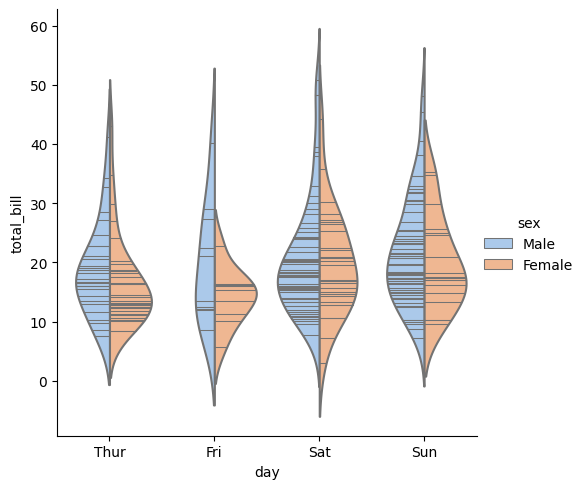

In [136]:
sns.catplot(
    data=tips, x="day", y="total_bill", hue="sex",
    kind="violin", inner="stick", split=True, palette="pastel",
)


Axes(0.125,0.53;0.352273x0.35)


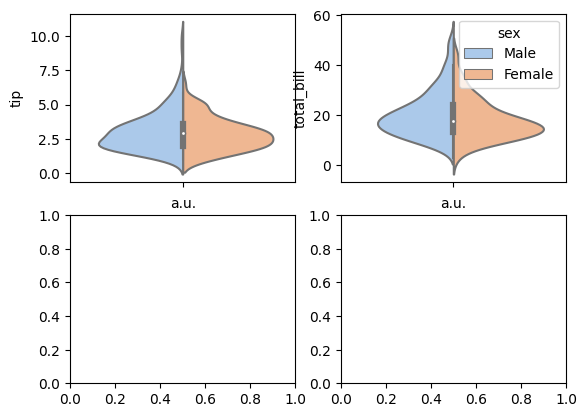

In [137]:
fig, axs = plt.subplots(2, 2)
tips['a.u.'] = ''
g = sns.violinplot(ax=axs[0, 0], data=tips, x='a.u.', y="tip", hue="sex", split=True, palette="pastel", inner="box")
g = sns.violinplot(ax=axs[0, 1], data=tips, x='a.u.', y="total_bill", hue="sex", split=True, palette="pastel", inner="box")

# sns.barplot(ax=axs[0, 0], x=tips.index, y=tips.total_bill)
# axs[0, 0].set_title("tip")
print(axs[0, 0])
axs[0, 0].legend([], [], frameon=False)

In [138]:
dir(axs[0, 0])



['ArtistList',
 '_AxesBase__clear',
 '_PROPERTIES_EXCLUDED_FROM_SET',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_text',
 '_adjustable',
 '_agg_filter',
 '_alias_map',
 '_alpha',
 '_anchor',
 '_animated',
 '_aspect',
 '_autotitlepos',
 '_axes',
 '_axes_locator',
 '_axis_map',
 '_axis_names',
 '_axisbelow',
 '_box_aspect',
 '_callbacks',
 '_check_no_units',
 '_children',
 '_clipon',
 '_clippath',
 '_cm_set',
 '_colorbars',
 '_convert_dx',
 '_current_image',
 '_default_contains',
 '_errorevery_to_mask',
 '_facecolor',
 '_fill_between_x_or_y',
 '_frameon',
 '_fully_clipped_to_axes',
 '_gci',
 '_gen_axes_patch',
 '_gen_axes_spine

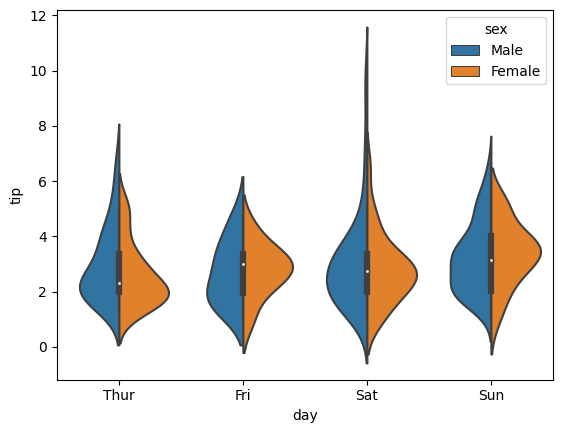

In [139]:
sns.violinplot(data=tips, x='day', y='tip', hue='sex', split=True)
plt.show()

<Axes: ylabel='tip'>

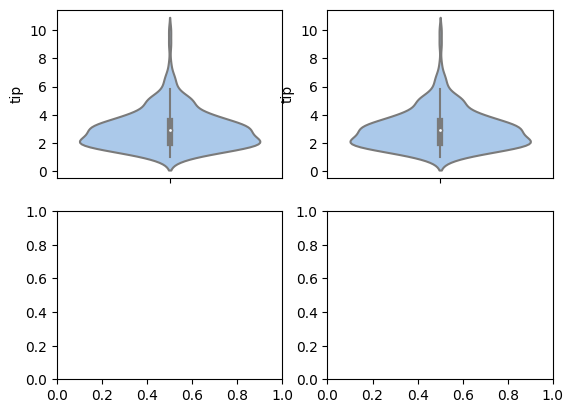

In [140]:
fig, axs = plt.subplots(2, 2)

sns.violinplot(ax=axs[0, 0], data=tips, y="tip", hue="sex", split=True, palette="pastel")
# sns.barplot(ax=axs[0, 0], x=tips.index, y=tips.total_bill)
# axs[0, 0].set_title("tip")
sns.violinplot(ax=axs[0, 1], data=tips, y="tip", hue="sex", split=True, palette="pastel")


## mplhep style

In [143]:
import mplhep as hep
hep.style.use(hep.style.ROOT) # For now ROOT defaults to CMS
# Or choose one of the experiment styles
hep.style.use(hep.style.ATLAS)
# or
hep.style.use("CMS")
plt.style.use(hep.style.ROOT)

In [144]:
plt.style.use(hep.style.ROOT)

In [146]:
g = sns.catplot(
    data=titanic,
    x="fare", y="embark_town", row="class",
    kind="box", orient="h",
    sharex=False, margin_titles=True,
    height=1.5, aspect=4,
)
g.set(xlabel="Fare", ylabel="")
g.set_titles(row_template="{row_name} class")
for ax in g.axes.flat:
    ax.xaxis.set_major_formatter('${x:.0f}')

NameError: name 'titanic' is not defined

In [18]:
mc.daughters

<Array [[[], []], [[], []], ..., [[], []]] type='100 * var * var * int32'>

In [19]:
mc['firstmother_pdgid'] = mc.pdgid

In [20]:

sim = reader.getDataFrame('simpart', 100)

['simpart_eta', 'simpart_phi', 'simpart_pt', 'simpart_energy', 'simpart_dvx', 'simpart_dvy', 'simpart_dvz', 'simpart_ovx', 'simpart_ovy', 'simpart_ovz', 'simpart_mother', 'simpart_exphi', 'simpart_exeta', 'simpart_exx', 'simpart_exy', 'simpart_fbrem', 'simpart_pid', 'simpart_gen', 'simpart_reachedEE', 'simpart_fromBeamPipe']
{'eta': 'simpart_eta', 'phi': 'simpart_phi', 'pt': 'simpart_pt', 'energy': 'simpart_energy', 'dvx': 'simpart_dvx', 'dvy': 'simpart_dvy', 'dvz': 'simpart_dvz', 'ovx': 'simpart_ovx', 'ovy': 'simpart_ovy', 'ovz': 'simpart_ovz', 'mother': 'simpart_mother', 'exphi': 'simpart_exphi', 'exeta': 'simpart_exeta', 'exx': 'simpart_exx', 'exy': 'simpart_exy', 'fbrem': 'simpart_fbrem', 'pid': 'simpart_pid', 'gen': 'simpart_gen', 'reachedEE': 'simpart_reachedEE', 'fromBeamPipe': 'simpart_fromBeamPipe'}
0 100
[{eta: [0.82, -0.82, ..., 0.821], phi: [1.95, ...], pt: [...], ...}, ..., {...}]


In [33]:
sim[sim.gen != -1].gen-1

<Array [[0, 1], [0, 1], [0, ...], ..., [0, 1], [0, 1]] type='100 * var * int32'>

In [40]:
sim['test'] = sim.gen
sim.test

<Array [[1, 2, -1, -1, -1, ..., -1, -1, -1, -1], ...] type='100 * var * int32'>

In [48]:
sim[sim.gen !=-1].gen-1

<Array [[0, 1], [0, 1], [0, ...], ..., [0, 1], [0, 1]] type='100 * var * int32'>

In [58]:
ak.count(mc.pdgid[sim[sim.gen !=-1].gen-1], axis=1)

<Array [2, 2, 2, 2, 2, 2, 2, 2, ..., 2, 2, 2, 2, 2, 2, 2, 2] type='100 * int64'>

In [63]:
sim['test'] = mc.pdgid[sim[sim.gen !=-1].gen-1]

In [65]:
ak.padding_none(sim.test)

AttributeError: module 'awkward' has no attribute 'padding_none'

In [71]:
sim

<Array [{eta: [0.82, ...], phi: ..., ...}, ...] type='100 * {eta: var * flo...'>

In [3]:

# import hist as Hist
import hist

x_categories=['a', 'b']
b_x_axis_name='categories'
y_nbins=10
y_bin_low=0
y_bin_high=10
b_y_axis_name='y'
b_name='Test'
b_label='label'
pippo = hist.Hist(
        hist.axis.StrCategory(x_categories, name=b_x_axis_name), 
        hist.axis.Regular(bins=y_nbins, start=y_bin_low, stop=y_bin_high, name=b_y_axis_name), 
        label=b_label, 
        name=b_name,
        storage=hist.storage.Weight()
        )


In [46]:
ele_p4.pt
ele_p4['category'] = ['a']

In [47]:
pippo.fill(ak.flatten(ele_p4.category), ak.flatten(ele_p4.pt))
ele_p4.category

<Array [['a', 'a'], ['a', ..., 'a'], ..., ['a']] type='2000 * var * string'>

In [70]:
ak.to_regular(sim[['gen', 'test']], axis=1)

ValueError: cannot convert to RegularArray because subarray lengths are not regular (in compiled code: https://github.com/scikit-hep/awkward/blob/awkward-cpp-15/awkward-cpp/src/cpu-kernels/awkward_ListOffsetArray_toRegularArray.cpp#L22)

This error occurred while calling

    ak.to_regular(
        array = <Array [{gen: [...], ...}, ..., {...}] type='100 * {gen: va...'>
        axis = 1
        highlevel = True
        behavior = None
    )

In [165]:
import python.selections as sel

In [166]:
mysel = sel.Selection('EtaABC', '1.49 < |#eta^{TOBJ}| <= 2.4', lambda array: 1.49 < abs(array.eta) <= 2.4)
mysel.selection(TkEleEE)

ValueError: the truth value of an array whose length is not 1 is ambiguous; use ak.any() or ak.all()

In [167]:
(abs(TkEleEE.eta) <= 2.4) & (abs(TkEleEE.eta) < 1.49)

<Array [[], [], [False], [], ..., [], [], [False], []] type='100 * var * bool'>

In [168]:
# sel_match[ak.max(sel_match.dpt)]
best_match = sel_match[ak.argmin(sel_match.dpt, axis=1, keepdims=True)]
best_match

NameError: name 'sel_match' is not defined

In [169]:
tkele[best_match.ele_idx]

NameError: name 'best_match' is not defined

In [187]:
gen[best_match.gen_idx]

<Array [{pt: [None], eta: [None], ...}, ...] type='1120 * {pt: var * ?float...'>

In [170]:
def selection1(array):
    return array.pt > 3

In [171]:
akarr['pt2'] = akarr.pt *2

NameError: name 'akarr' is not defined

In [172]:
akarr[akarr.pt>3]

NameError: name 'akarr' is not defined

In [173]:
akarr[selection1(akarr)].L2TkEle_eta


NameError: name 'akarr' is not defined

In [174]:
select = akarr[ak.count(akarr.L2TkEle_pt, axis=1) > 1]
select

NameError: name 'akarr' is not defined

In [175]:
ak.flatten(select.L2TkEle_pt)

NameError: name 'select' is not defined

In [71]:
select['pt_pair'] = ak.combinations(select.L2TkEle_pt, 2)
select.pt_pair

<Array [[(11.8, 4.25)], ..., [(..., ...), ...]] type='74 * var * (float32, ...'>

In [149]:

import itertools

In [177]:
tree['gen_daughters'].show(interpretation_width=80)

name                 | typename                 | interpretation                                                                  
---------------------+--------------------------+---------------------------------------------------------------------------------
gen_daughters        | std::vector<std::vector< | AsObjects(AsVector(True, AsVector(False, dtype('>i4'))))                        


In [178]:
tree['gen_pt'].show(interpretation_width=80)

name                 | typename                 | interpretation                                                                  
---------------------+--------------------------+---------------------------------------------------------------------------------
gen_pt               | std::vector<float>       | AsJagged(AsDtype('>f4'), header_bytes=10)                                       


In [19]:
import numpy as np

In [20]:
gen = tree.arrays(['gen_daughters'], library='pd', entry_start=0, entry_stop=300,interpretation_executor=uproot4.AsObjects(uproot4.AsVector(False, uproot4.AsVector(False, np.dtype('>i4')))))

AttributeError: 'AsObjects' object has no attribute 'submit'

In [ ]:
gen.iloc[0].values[0]

In [23]:
evt_idx = 0
tree.LoadTree(evt_idx)
print(tree.GetEntries())

AttributeError: 'Model_TTree_v20' object has no attribute 'LoadTree'

In [8]:


branches = ["egammaEE_pt", "egammaEE_eta"]
entry = 2
nd_array = rnp.tree2array(tree,
                          branches=branches,
                          start=entry,
                          stop=entry+1,
                          cache_size=400000000)

# nparray = df.Range(0,1,1).AsNumpy(["egammaEE_pt", "egammaEE_eta"])


# print(nparray['egammaEE_pt'], nparray['egammaEE_eta'])



TypeError: tree must be a ROOT.TTree

In [6]:
nd_array

array([(array([ 6.643593  ,  2.9719217 ,  3.9068716 ,  1.5156915 ,  1.300692  ,
        0.        ,  2.9264858 ,  0.2225242 ,  1.2117369 ,  0.        ,
        4.9720078 ,  3.016645  ,  2.7175887 ,  0.73760176,  0.76564455,
        0.        ,  0.5842581 ,  0.        ,  2.025458  ,  0.        ,
        1.0230687 ,  0.        ,  3.6402414 ,  1.5460535 ,  1.0310024 ,
        0.        ,  6.9713054 ,  4.120867  ,  5.0303583 ,  2.6534646 ,
        8.857585  ,  5.3984365 ,  4.317563  ,  2.2437658 ,  6.8248177 ,
        2.0740685 ,  2.9123976 ,  0.4002606 ,  2.3496022 ,  0.45174542,
        3.8635688 ,  1.7373753 ,  5.3682675 ,  2.0934558 ,  6.070648  ,
        3.5421746 ,  2.2283947 ,  0.21598236,  4.280787  ,  2.130282  ,
        4.3815894 ,  1.5497304 ,  2.0520558 ,  0.        ,  1.9534774 ,
        0.        ,  1.7097489 ,  0.        ,  2.9150255 ,  0.04426523,
       10.138936  ,  7.368551  ,  4.427791  ,  2.3982875 ,  4.7439966 ,
        2.8332458 ,  1.9536077 ,  0.        , 19.978153 

In [7]:
dir(df.Display)

NameError: name 'df' is not defined

In [ ]:
data = {}
for idx, branch in enumerate(branches):
    data[branch] = nd_array[branch][0]


In [13]:
df = ROOT.RDF.MakeNumpyDataFrame(data)

In [14]:
for colname in df.GetColumnNames():
    print (colname)

egammaEE_pt
egammaEE_eta


In [8]:
# %load ../NtupleDataFormat.py
# import math
# import collections

from __future__ import print_function
import ROOT
import pandas as pd
import root_numpy as rnp


##########
class HGCalNtuple(object):
    """Class abstracting the whole ntuple/TTree.

    Main benefit is to provide nice interface for
    - iterating over events
    - querying whether hit/seed information exists

    Note that to iteratate over the evets with zip(), you should use
    itertools.izip() instead.
    """

    def __init__(self, fileNames, tree="ana/hgc"):
        """Constructor.

        Arguments:
        fileName -- String for path to the ROOT file
        tree     -- Name of the TTree object inside the ROOT file (default: 'ana/hgc')
        """
        super(HGCalNtuple, self).__init__()
        self._tree = ROOT.TChain(tree)
        self._branches = []
        branch_blacklist = ['tc_wafer',
                            'tc_cell',
                            'tc_waferu',
                            'tc_waferv',
                            'tc_cellu',
                            'tc_cellv',
                            'gen_PUNumInt',
                            'gen_TrueNumInt']

        for file_name in fileNames:
            protocol = ''
            if '/eos/user/' in file_name:
                protocol = 'root://eosuser.cern.ch/'
            elif '/eos/cms/' in file_name:
                protocol = 'root://eoscms.cern.ch/'

            self._tree.Add(protocol+file_name)
            if len(self._branches) == 0:
                self._branches = [br for br in rnp.list_branches(protocol+file_name, tree) if br not in branch_blacklist]
        # print 'Cache size: {}'.format(self._tree.GetCacheSize())

        self._entries = self._tree.GetEntries()

    def setCache(self, learn_events=-1, entry_range=None):
        print('Resetting cache: {}'.format(self._tree.SetCacheSize(0)))
        cachesize = 400000000
        print('Setting new cache size: {}'.format(self._tree.SetCacheSize(cachesize)))
        if learn_events != -1:
            print('Setting # of entries for cache learning: {} to {}'.format(
                self._tree.SetCacheLearnEntries(learn_events), learn_events))
        else:
            print(self._tree.AddBranchToCache("*", True))
            # print self._tree.AddBranchToCache("cl_layer")
            self._tree.StopCacheLearningPhase()

        if entry_range:
            print('Setting cache entry range: {}'.format(
                self._tree.SetCacheEntryRange(entry_range[0], entry_range[-1])))
        print('Cache size: {}'.format(self._tree.GetCacheSize()))

    def PrintCacheStats(self):
        self._tree.PrintCacheStats('cachedbranches')

    def tree(self):
        return self._tree

    def nevents(self):
        return self._entries

    # def hasRawRecHits(self):
    #     """Returns true if the ntuple has raw RecHit information."""
    #     return hasattr(self._tree, "rechit_raw_pt")

    def __iter__(self):
        """Returns generator for iterating over TTree entries (events)

        Generator returns Event objects.

        """
        for jentry in range(self._entries):
            # get the next tree in the chain and verify
            ientry = self._tree.LoadTree(jentry)
            if ientry < 0:
                break
            # copy next entry into memory and verify
            nb = self._tree.GetEntry(jentry)
            if nb <= 0:
                continue

            yield Event(self._tree, jentry, self._branches)

    def getEvent(self, index):
        """Returns Event for a given index"""
        ientry = self._tree.LoadTree(index)
        if ientry < 0:
            return None
        # nb = self._tree.GetEntry(index)  # ientry or jentry?
        # if nb <= 0:
        #     None

        return Event(self._tree, index, self._branches)  # ientry of jentry?


##########
class Event(object):
    """Class abstracting a single event.

    Main benefit is to provide nice interface to get various objects
    or collections of objects.
    """

    def __init__(self, tree, entry, branches):
        """Constructor.

        Arguments:
        tree  -- TTree object
        entry -- Entry number in the tree
        """
        super(Event, self).__init__()
        self._tree = tree
        self._entry = entry
        self._branches = branches

    def entry(self):
        return self._entry

    def event(self):
        """Returns event number."""
        return self._tree.event

    def lumi(self):
        """Returns lumisection number."""
        return self._tree.lumi

    def run(self):
        """Returns run number."""
        return self._tree.run

    def eventId(self):
        """Returns (run, lumi, event) tuple."""
        return (self._tree.run, self._tree.lumi, self._tree.event)

    def eventIdStr(self):
        """Returns 'run:lumi:event' string."""
        return "%d:%d:%d" % self.eventId()

    def getDataFrame(self, prefix, fallback=None):

        branches = [br for br in self._branches
                    if br.startswith(prefix+'_') and
                    not br == '{}_n'.format(prefix)]
        names = ['_'.join(br.split('_')[1:]) for br in branches]

        if len(branches) == 0:
            if fallback is not None:
                return self.getDataFrame(prefix=fallback)
            return pd.DataFrame()

        nd_array = rnp.tree2array(self._tree,
                                  branches=branches,
                                  start=self._entry,
                                  stop=self._entry+1,
                                  cache_size=400000000)

        df = pd.DataFrame(columns=names)
        for idx, branch in enumerate(branches):
            df[names[idx]] = nd_array[branch][0]
        return df


    def getPUInfo(self):
        branches = ['gen_PUNumInt', 'gen_TrueNumInt']
        names = ['PU', 'PUTrue']
        nd_array = rnp.tree2array(self._tree, branches=branches,
                                  start=self._entry, stop=self._entry+1)
        df = pd.DataFrame(columns=names)
        for idx, name in enumerate(names):
            df[name] = [nd_array[0][idx]]
        return df


In [9]:
ntuple = HGCalNtuple(input_files, tree_name)


In [10]:
evt_idx = 0

In [182]:

event = ntuple.getEvent(evt_idx)

NameError: name 'ntuple' is not defined

In [180]:
import python.collections as coll

In [181]:
coll.tkem_EE.fill(event, debug)

NameError: name 'event' is not defined

In [21]:
coll.tkem_EE.df.dtypes

pt           float32
energy       float32
eta          float32
phi          float32
hwQual       float32
tkIso        float32
tkIsoPV      float32
pfIso        float32
pfIsoPV      float32
looseTkID       bool
photonID        bool
dtype: object

In [22]:
coll.tkem_EE.df['test'] = 1.
coll.tkem_EE.df.test

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
301    1.0
302    1.0
303    1.0
304    1.0
305    1.0
Name: test, Length: 306, dtype: float64

In [23]:
coll.tkem_EE.df.looseTkID.values

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [24]:
datadict = {}
for col in coll.tkem_EE.df.columns:
    if col in ['looseTkID', 'photonID']:
        continue
    datadict[col] = coll.tkem_EE.df[col].values


In [25]:
datadict

{'pt': array([1.0471219 , 0.        , 0.9309919 , 0.        , 0.8299963 ,
        0.        , 1.8280152 , 0.        , 0.6906006 , 0.        ,
        1.4519302 , 0.        , 0.7814226 , 0.        , 2.0772543 ,
        0.04368379, 3.349274  , 0.7291381 , 7.6142917 , 2.102239  ,
        1.3601102 , 0.        , 1.1078637 , 0.        , 0.949197  ,
        0.        , 2.3532417 , 0.        , 1.8976434 , 0.        ,
        5.507132  , 2.249416  , 1.7864147 , 0.        , 0.6643612 ,
        0.        , 5.1721015 , 1.7180849 , 4.8361177 , 2.3169558 ,
        2.6669288 , 0.2981977 , 5.7898808 , 3.8040826 , 4.3599057 ,
        1.3806417 , 3.8905418 , 0.73756325, 2.363905  , 0.        ,
        1.6467872 , 0.        , 3.2733142 , 1.0909094 , 1.9897656 ,
        0.        , 3.076519  , 0.857164  , 2.0942447 , 0.        ,
        3.735676  , 1.0636082 , 2.2733889 , 0.        , 2.3596497 ,
        0.24583   , 6.138474  , 1.8592441 , 5.7122846 , 2.7330227 ,
        2.0445237 , 0.        , 1.7429491 

In [26]:
rdf = ROOT.RDF.MakeNumpyDataFrame(datadict)
for col in rdf.GetColumns():
    print(col)

AttributeError: 'RDataFrame' object has no attribute 'GetColumns'

In [ ]:
import python.selections as sel

In [ ]:
sel.eg_id_pt_ee_selections

In [ ]:
sel.eg_id_pt_ee_selections[6].selection

In [ ]:
%time rdf.Filter(sel.eg_id_pt_ee_selections[0].selection).Count().GetValue()

In [ ]:
coll.tkem_EE.cached_queries = dict()

In [ ]:
%time coll.tkem_EE.query(sel.eg_id_pt_ee_selections[0])

In [11]:
%time 
htemp = rdf.Filter(sel.eg_id_pt_ee_selections[0].selection).Histo1D(ROOT.RDF.TH1DModel('pippo'+'_pt_temp', 'EG Pt (GeV); p_{T} [GeV]', 100, 0, 100), 'pt')

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 8.82 µs


NameError: name 'rdf' is not defined

In [ ]:
%time htemp.GetValue()

In [ ]:
import numba
import numpy as np

In [ ]:
import numba


@numba.jit
def f_plain(x):
    return x * (x - 1)


@numba.jit
def integrate_f_numba(a, b, N):
    s = 0
    dx = (b - a) / N
    for i in range(N):
        s += f_plain(a + i * dx)
    return s * dx


@numba.jit
def apply_integrate_f_numba(col_a, col_b, col_N):
    n = len(col_N)
    result = np.empty(n, dtype="float64")
    assert len(col_a) == len(col_b) == n
    for i in range(n):
        result[i] = integrate_f_numba(col_a[i], col_b[i], col_N[i])
    return result


def compute_numba(df):
    result = apply_integrate_f_numba(
        df["a"].to_numpy(), df["b"].to_numpy(), df["N"].to_numpy()
    )
    return pd.Series(result, index=df.index, name="result")

@numba.jit

def fill_test(histo, col_a):
    n = len(col_a)
    for i in range(n):
        histo.Fill(col_a[i])




In [ ]:
@numba.jit
def fill_test(histo, col_a):
    n = len(col_a)
    for i in range(n):
        histo.Fill(col_a[i])



In [ ]:
@cython.boundscheck(False)
@cython.wraparound(False)
def fill_h1(hist, np.ndarray[np.double_t, ndim=1] array, np.ndarray[np.double_t, ndim=1] weights=None,
            bool return_indices=False):
    # perform type checking on python side
    cdef TH1* _hist = <TH1*> PyCObject_AsVoidPtr(hist)
    cdef SIZE_t size = array.shape[0]
    cdef np.ndarray[np.int_t, ndim=1] idx = np.empty(0, dtype=np.int)
    cdef SIZE_t i
    cdef int bin_idx
    if return_indices:
        idx = np.empty(size, dtype=np.int)
    if weights is not None:
        for i from 0 <= i < size:
            bin_idx = _hist.Fill(array[i], weights[i])
            if return_indices:
                idx[i] = bin_idx
    else:
        for i from 0 <= i < size:
            bin_idx = _hist.Fill(array[i])
            if return_indices:
                idx[i] = bin_idx
    if return_indices:
        return idx

In [ ]:
coll.tkem_EE.df.pt.values
print (len(coll.tkem_EE.df.phi.values))

In [17]:
myhisto = ROOT.TH1F('name'+'_pt', 'EG Pt (GeV); p_{T} [GeV]', 100, 0, 100)

# apply_integrate_f_numba(coll.tkem_EE.df.pt.values, coll.tkem_EE.df.eta.values, coll.tkem_EE.df.phi.values)

In [28]:
%time fill_test(myhisto, coll.tkem_EE.df.pt.values)

NameError: name 'fill_test' is not defined

In [1]:
ROOT.gROOT.ProcessLine('#include "../src/fastfilling.h"');

NameError: name 'ROOT' is not defined

In [31]:
ROOT.fillTH1Fast1(coll.tkem_EE.df.phi.values)

AttributeError: Failed to get attribute fillTH1Fast1 from ROOT

In [18]:
manager = ROOT.FillerManager()

In [19]:
pts = coll.tkem_EE.df.pt.values

manager.add_1Dhisto(myhisto, pts, coll.tkem_EE.df.looseTkID.values)

   entry: 0 value: 1.04712
   entry: 1 value: 0
   entry: 2 value: 0.930992
   entry: 3 value: 0
   entry: 4 value: 0.829996
   entry: 5 value: 0
   entry: 6 value: 1.82802
   entry: 7 value: 0
   entry: 8 value: 0.690601
   entry: 9 value: 0
   entry: 10 value: 1.45193
   entry: 11 value: 0
   entry: 12 value: 0.781423
   entry: 13 value: 0
   entry: 14 value: 2.07725
   entry: 15 value: 0.0436838
   entry: 16 value: 3.34927
   entry: 17 value: 0.729138
   entry: 18 value: 7.61429
   entry: 19 value: 2.10224
   entry: 20 value: 1.36011
   entry: 21 value: 0
   entry: 22 value: 1.10786
   entry: 23 value: 0
   entry: 24 value: 0.949197
   entry: 25 value: 0
   entry: 26 value: 2.35324
   entry: 27 value: 0
   entry: 28 value: 1.89764
   entry: 29 value: 0
   entry: 30 value: 5.50713
   entry: 31 value: 2.24942
   entry: 32 value: 1.78641
   entry: 33 value: 0
   entry: 34 value: 0.664361
   entry: 35 value: 0
   entry: 36 value: 5.1721
   entry: 37 value: 1.71808
   entry: 38 value: 4.

In [20]:
manager.fill()

SegmentationViolation: void FillerManager::fill() =>
    SegmentationViolation: segfault in C++; program state was reset

# of events: 35053564126224
FILL histo: name_pt: 0x7f862ce3a1c0
   entry: 0 value: [/opt/root/root6/lib/libCore.so] TUnixSystem::DispatchSignals(ESignals) (no debug info)
[/usr/lib/system/libsystem_platform.dylib] _sigtramp (no debug info)
[/usr/lib/system/libsystem_malloc.dylib] tiny_free_no_lock (no debug info)
[<unknown binary>] (no debug info)
[<unknown binary>] (no debug info)
[/opt/root/root6/lib/libcppyy_backend3_8.so] WrapperCall(long, unsigned long, void*, void*, void*) (no debug info)
[/opt/root/root6/lib/libcppyy3_8.so] CPyCppyy::(anonymous namespace)::VoidExecutor::Execute(long, void*, CPyCppyy::CallContext*) (no debug info)
[/opt/root/root6/lib/libcppyy3_8.so] CPyCppyy::CPPMethod::ExecuteFast(void*, long, CPyCppyy::CallContext*) (no debug info)
[/opt/root/root6/lib/libcppyy3_8.so] CPyCppyy::CPPMethod::ExecuteProtected(void*, long, CPyCppyy::CallContext*) (no debug info)
[/opt/root/root6/lib/libcppyy3_8.so] CPyCppyy::CPPMethod::Call(CPyCppyy::CPPInstance*&, _object*, _objec

 *** Break *** segmentation violation


In [ ]:
pts

In [32]:
import hist
from hist import Hist

In [69]:
h = Hist(hist.axis.Regular(bins=10, start=0, stop=1, name="x-name", label='x-label'), name='name', label='label')
# h.name = 'h_test'
# h.label = 'label'
h_uproot = uproot4.to_writable(h)
h_pyroot = uproot4.pyroot.to_pyroot(h_uproot)

h.fill(0.9)


Hist(Regular(10, 0, 1, name='x-name', label='x-label'), storage=Double()) # Sum: 1.0

In [46]:
h_pyroot.GetTitle()

'name'

In [47]:
h_pyroot.GetName()

'untitled_4'

In [48]:
f = ROOT.TH1F('h1','title',10,0,10)

In [49]:
f.GetName()

'h1'

In [11]:
import boost_histogram as bh

In [36]:

# Compose axis however you like; this is a 2D histogram
hist2d = bh.Histogram(bh.axis.Regular(2, 0, 1),
                    bh.axis.Regular(4, 0.0, 1.0))

# Filling can be done with arrays, one per dimension
hist2d.fill([.3, .5, .2],
          [.1, .4, .9])

# NumPy array view into histogram counts, no overflow bins
counts = hist.view()


In [37]:
hist2d.lable = "ciccio"


In [38]:
hist2d

Histogram(
  Regular(2, 0, 1),
  Regular(4, 0, 1),
  storage=Double()) # Sum: 3.0

In [29]:
import matplotlib.pyplot as plt


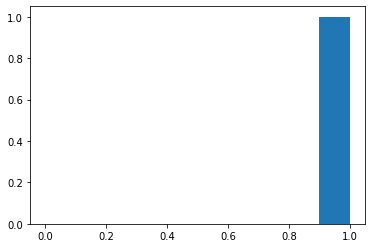

In [31]:
plt.bar(h.axes[0].centers, h, h.axes[0].widths);

In [32]:
h.label = "pippo"
h.axes[0].label='un asse'

In [50]:
h.name = "name h; X [GeV]"

In [66]:
h.axes[0].label


'x'

In [54]:
h.label
h.axes[0]

h_uproot = uproot4.to_writable(h)


In [74]:
h.label

'label'

In [75]:
h.name

'name'

In [76]:
root_file = uproot4.recreate("demo_uproot_file.root")
# root_file["words"] = "See what is in the ROOT File!"
# root_file[h.name] = h.to_numpy()
root_file[h.label] = h_uproot
# root_file['ugo'] = hist2d.to_numpy()
root_file.close()

In [59]:
h_pyroot = uproot4.pyroot.to_pyroot(h_uproot)


In [58]:
h_pyroot

In [60]:
h_pyroot.GetTitle()

'name'

In [ ]:
h_pyroot.GetTitle()

In [61]:
h_pyroot.GetXaxis().GetTitle()

'x'

In [62]:
root_file['test'] = h_pyroot

In [72]:
c = ROOT.TCanvas()

In [73]:
c.cd()
h_uproot.Draw()
c.Draw()

AttributeError: 'Model_TH1D_v3' object has no attribute 'Draw'